
# Final project 
# Name: Gilbert Urinzwenimana
# Andrew ID: gurinzwe

# Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# PART 2: Data Preprocessing and Exploration

### Loading Data

In [2]:
data=pd.read_excel('Telco_customer_churn.xlsx')

# a) Clean the dataset by handling missing values, outliers, and inconsistent data. 

## Checking the size of the dataset

In [3]:
data.shape

(7043, 33)

### Knowing the size  helps to know if the system can handle the data(memory and computation speed)

## Displaying the first few rows of the dataset

In [4]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Dropping columns which are not necessary for either customer segmentation or churn prediction

In [5]:
data=data.drop(['Count','Zip Code','Latitude','Longitude','CustomerID','Lat Long','Churn Reason','Country','State','City','Internet Service'],axis=1)

In [6]:
data.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV'],
      dtype='object')

In [7]:
# Displaying the new dataframe with necessay columns
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,Female,No,No,Yes,2,Yes,No,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,Female,No,No,Yes,8,Yes,Yes,No,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,Female,No,Yes,Yes,28,Yes,Yes,No,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,Male,No,No,Yes,49,Yes,Yes,No,Yes,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340


### This allows to quickly preview the data's structure, column names, and sample values.

## Displaying summary of the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Online Security    7043 non-null   object 
 8   Online Backup      7043 non-null   object 
 9   Device Protection  7043 non-null   object 
 10  Tech Support       7043 non-null   object 
 11  Streaming TV       7043 non-null   object 
 12  Streaming Movies   7043 non-null   object 
 13  Contract           7043 non-null   object 
 14  Paperless Billing  7043 non-null   object 
 15  Payment Method     7043 non-null   object 
 16  Monthly Charges    7043 

### This helps identify potential issues like missing data, incorrect data types, and high memory usage

### Total Charges is numerical but it is stored as object, so we need to convert it to numerical

In [9]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

## checking for missing values

In [10]:
data.isnull().sum()

Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
dtype: int64

### This helps identify any missing values that need to be addressed before analysis because missing data can skew analysis, affect model performance, and lead to incorrect conclusions

In [11]:
# Imputing 11 missing values in Total Charges column with the mean
data['Total Charges'].fillna(data['Total Charges'].mean(), inplace=True)

In [12]:
data.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

## Displaying descriptive statistics

In [13]:
data.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,24.559481,30.090047,2265.000258,0.441561,21.525131,1183.057152
min,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000
50%,29.000000,70.350000,1400.550000,0.000000,61.000000,4527.000000
75%,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


### central tendency, spread, and range of the data this helps identify potential outliers and understand the distribution of the data. 
For example, all numerical columns have a count of 7043, indicating that there are no missing values.


## Checking for inconsistencies in the data

In [14]:
# Checking for duplicate rows
data.duplicated().sum()


np.int64(0)

In [15]:
# Checking for inconsistent values 


## Separating numerical and categorical columns to make analysis easier

In [16]:
data_num = data.select_dtypes(include=['int64', 'float64'])
data_cat = data.select_dtypes(include=['object'])

In [17]:
# printing numerical columns
print("Numerical columns:", data_num.columns)

# printing categorical columns
print("\nCategorical columns:", data_cat.columns)

Numerical columns: Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

Categorical columns: Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label'],
      dtype='object')


### Insepecting inconsistent values in the columns

In [18]:
# Displaying the few rows of numerical data
data_num.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,2,53.85,108.15,1,86,3239
1,2,70.70,151.65,1,67,2701
2,8,99.65,820.50,1,86,5372
3,28,104.80,3046.05,1,84,5003
4,49,103.70,5036.30,1,89,5340


In [19]:
# Checking for inconsistent values in the numerical columns
print(data_num[data_num['Tenure Months'] <= 0])



      Tenure Months  Monthly Charges  Total Charges  Churn Value  Churn Score  \
2234              0            52.55    2283.300441            0           36   
2438              0            20.25    2283.300441            0           68   
2568              0            80.85    2283.300441            0           45   
2667              0            25.75    2283.300441            0           48   
2856              0            56.05    2283.300441            0           30   
4331              0            19.85    2283.300441            0           53   
4687              0            25.35    2283.300441            0           49   
5104              0            20.00    2283.300441            0           27   
5719              0            19.70    2283.300441            0           69   
6772              0            73.35    2283.300441            0           44   
6840              0            61.90    2283.300441            0           65   

      CLTV  
2234  2578  
2

### insights

1. For churn prediction the rows where tenure is zero will be dropped as scores for new customers(i supposed zero corresponds to new customer) may not reflect actual churn risk accurately.
2. For customer segmentation, theses rows will be kept and  considered as new customers.

In [20]:
# Displaying the few rows of categorical data
data_cat.head()

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label
0,Male,No,No,No,Yes,No,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
1,Female,No,No,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
2,Female,No,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
3,Female,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
4,Male,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes


### Inspecting inconsistent values in the categorical columns

In [21]:

for col in ['Gender', 'Partner', 'Dependents', 'Contract', 'Payment Method']:
    print(f"Unique values in {col}: {data_cat[col].unique()}")


Unique values in Gender: ['Male' 'Female']
Unique values in Partner: ['No' 'Yes']
Unique values in Dependents: ['No' 'Yes']
Unique values in Contract: ['Month-to-month' 'Two year' 'One year']
Unique values in Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


### This result  shows that no unexpected values are present in the categorical columns

# b) Performing exploratory data analysis (EDA) to understand distributions, correlations, and key trends.

### Checking data distribution in numerical columns

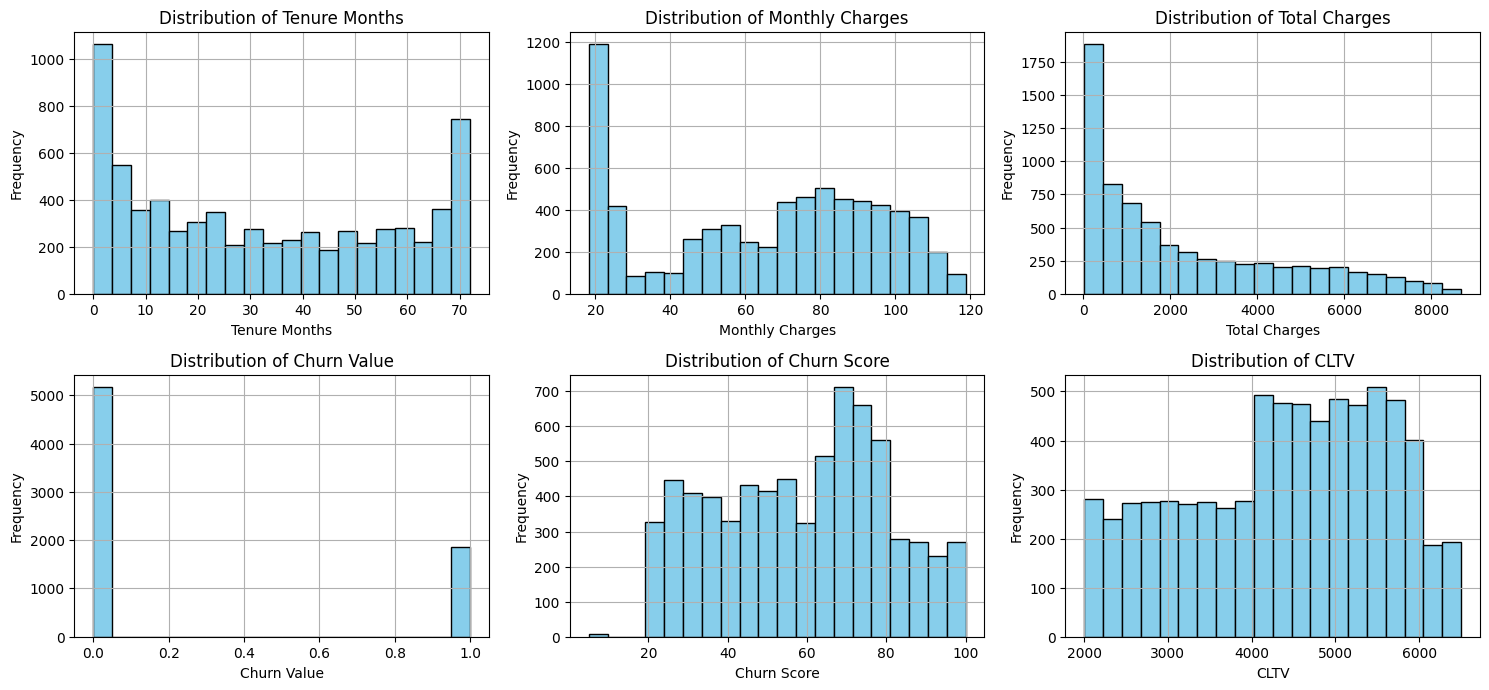

In [22]:
# Displaying the descriptive statistics of numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_num.columns, 1):
    plt.subplot(3,3, i) 
    data_num[column].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# display the histograms
plt.tight_layout()
plt.show()

### Insights

1. Tenure Months: This appears to be a bimodal distribution, with peaks at the beginning and end of the tenure range which means there are two groups of customers with different tenure lengths.one group has a shorter tenure and the other has a longer tenure.The group with shorter tenure has a higher frequency, indicating that there are more customers with shorter tenure than those with longer tenure.

2. Monthly Charges: This histogram shows a right-skewed distribution, with a higher frequency of customers having lower monthly charges.This means that there are more customers with lower monthly charges than those with higher monthly charges.

3. Churn Value: This is a binary distribution with a significant imbalance, where most customers have not churned (value 0) compared to those who have churned (value 1).

4. Churn Score: This distribution is relatively uniform but with a slight concentration in the middle range, indicating varied churn scores among customers.

5. Customer Lifetime Value (CLTV): The histogram indicates a relatively uniform distribution with a slight peak in the middle range, suggesting a wide spread of customer lifetime values.

### Distribution of categorical values 

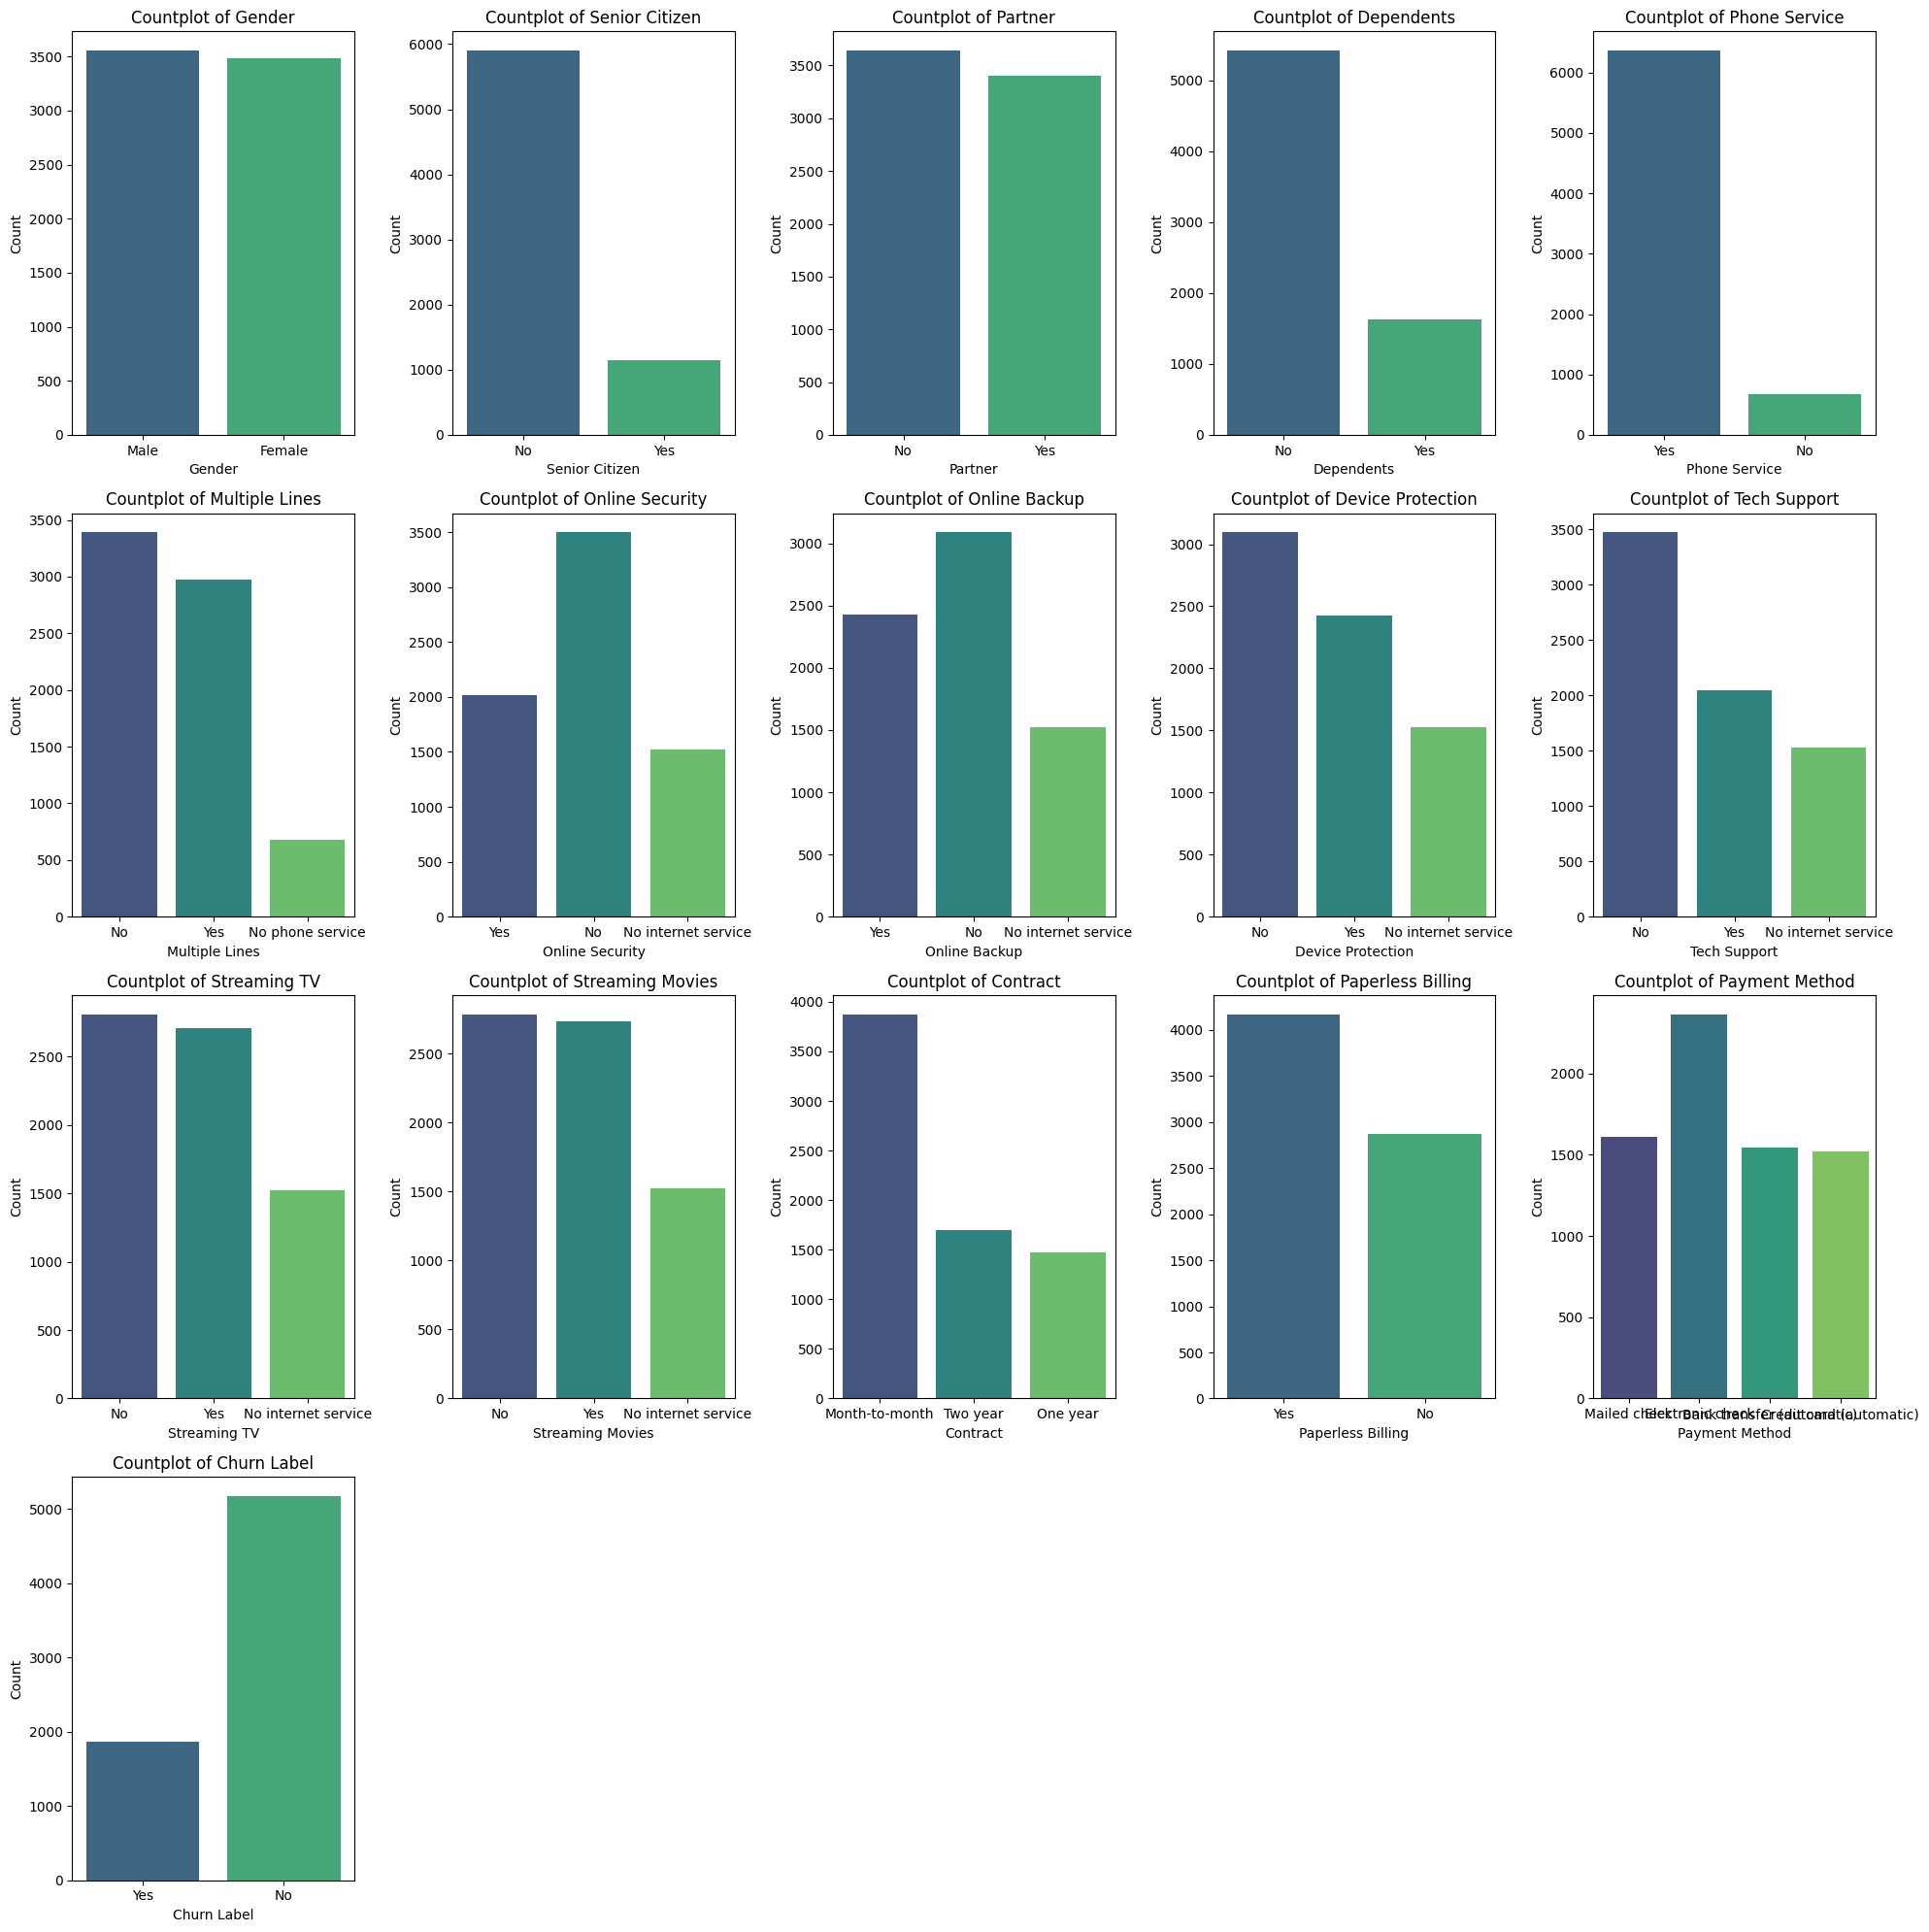

In [23]:
# creating a countplot for each categorical column
plt.figure(figsize=(20, 20))

# Loop through each column and create a subplot for each countplot
for i, column in enumerate(data_cat.columns[:20], 1):  
    plt.subplot(4, 5, i)  # Creating  a 4x5 grid of subplots
    sns.countplot(data=data_cat, x=column, palette='viridis')
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Observations from categorical data
1. Gender: The countplot of the Gender column shows a nearly equal distribution between Male and Female, indicating no significant bias towards one gender.
2. Senior Citizen: The countplot of the Senior Citizen column shows a significant imbalance, with a majority of customers not being senior citizens (value 0) compared to those who are senior citizens (value 1). 
3. Partner: The countplot of the Partner column shows a significant imbalance, with a majority of customers not having a partner (value No) compared to those who do have a partner (value Yes).
4. Dependents: The countplot of the Dependents column shows a significant imbalance, with a majority of customers not having dependents (value No) compared to those who do have dependents (value Yes).
5. phone service:  customers who do not have phone service (value No) are more than those who do have phone service (value Yes)
6. Multiple lines:customers who do not have multiple lines (value No) are more than those who do have multiple lines (value Yes)
7. Internet service:customers who do not have internet service (value No) are more than those who do have internet service (value Yes)
8. Online security:customers who do not have online security (value No) are more than those who do have online security (value Yes)
9. Online backup: customers who do not have online backup (value No) are more than those who do have online backup (value Yes)


### Insights from categorical data
Imbalance in churn Label Column: The countplot of the Churn Label column shows a significant imbalance, with a majority of customers not churned (value No) compared to those who have churned (value Yes).

In [24]:
# counting the number of churned in churn label
data_cat['Churn Label'].value_counts()


Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

This confirms the imbalance in the dataset, which can impact the performance of machine learning models if not addressed.

### Checking for outliers in numerical columns

In [25]:
# Checking for outliers in numerical columns
Q1 = data_num['Monthly Charges'].quantile(0.25)
Q3 = data_num['Monthly Charges'].quantile(0.75)
IQR = Q3 - Q1
outliers = data_num[(data_num['Monthly Charges'] < (Q1 - 1.5 * IQR)) | (data_num['Monthly Charges'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [Tenure Months, Monthly Charges, Total Charges, Churn Value, Churn Score, CLTV]
Index: []


### This output  suggests that there are no outliers in the “Monthly Charges” column based on the criteria used.

### Visulaizing using boxplot

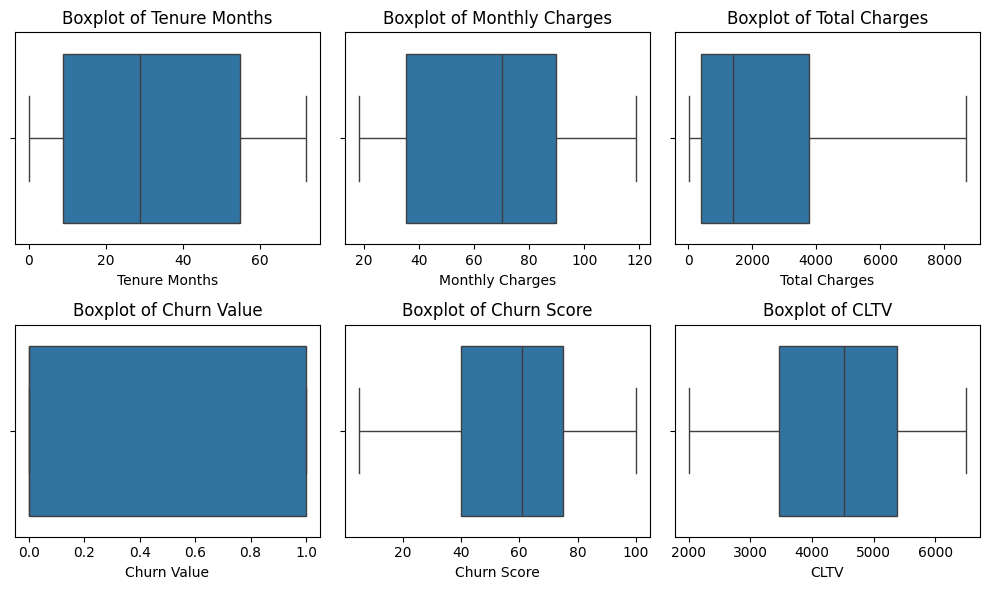

In [26]:

# Creating boxplots for each numerical column
plt.figure(figsize=(10, 6))
for i, column in enumerate(data_num.columns, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid
    sns.boxplot(data=data_num, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


### Insights

No significant outliers were found in the numerical columns as it can be seen from the boxplots. The distributions of the numerical columns appear to be relatively symmetric and have no extreme values.

## c) Performing feature engineering if necessary to derive new features

## Correlation between numerical columns

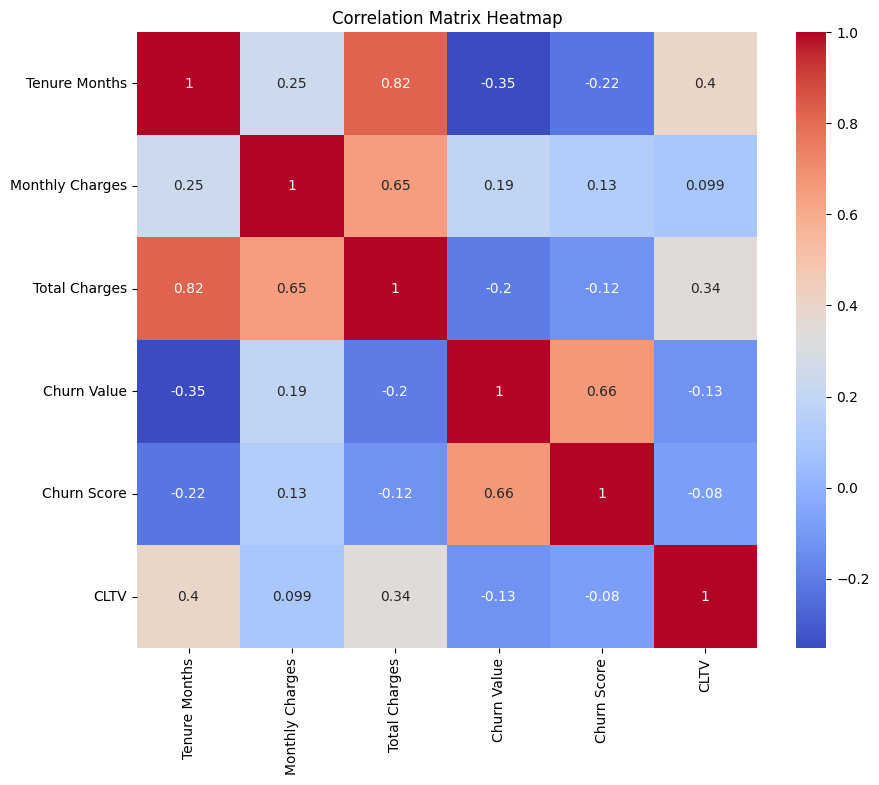

In [27]:

correlation_matrix = data_num.corr()
### Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


### insights
Based on the heatmap, no features have a strong correlation with each other, indicating that the features are not redundant and each feature provides unique information. This means they are all important for predicting the target variable.

## d) Prepare the data for unsupervised and supervised learning

## Encoding categorical variables and Standardizing numerical variables

### Encoding categorical variables

In [28]:


# Initialize LabelEncoder
le = LabelEncoder()

# Assuming 'data_cat' is your categorical dataframe
data_encoded = data_cat.copy()

# Apply LabelEncoder to each categorical column
for col in data_cat.columns:
    data_encoded[col] = le.fit_transform(data_cat[col])


### Machine learning typically expect numerical data as input, so encoding them into numerical data is necessary.

### Concatenate the encoded categorical data with the numerical data

In [29]:
data_encoded = pd.concat([data_encoded, data_num], axis=1)

### This will help to standardize the numerical data all to the same scale.

In [30]:
# Displaying columns to check if the the Dataframe has been concatenated properly
data_encoded.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label',
       'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

In [31]:
# Cheking the types of the columns in the encoded dataframe
data_encoded.dtypes

Gender                 int64
Senior Citizen         int64
Partner                int64
Dependents             int64
Phone Service          int64
Multiple Lines         int64
Online Security        int64
Online Backup          int64
Device Protection      int64
Tech Support           int64
Streaming TV           int64
Streaming Movies       int64
Contract               int64
Paperless Billing      int64
Payment Method         int64
Churn Label            int64
Tenure Months          int64
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
Churn Score            int64
CLTV                   int64
dtype: object

## Retrieving independent variables and target variable

In [32]:
# variables for churn prediction
X_pre = data_encoded.drop('Churn Label', axis=1)
y_pre = data_encoded['Churn Label']

# variables for customer segmentation
X_seg = data_encoded.drop(['Churn Score', 'Churn Value', 'Churn Label'], axis=1)



### In the above code i have separated the independent variables from the target variable for both churn prediction and  for customer segmentation, the features to be used are also in differnt dataframe.

# Standardizing numerical features 

In [33]:
# Standardize features for churn prediction
scaler_cl = StandardScaler()
X_cl_standardized = scaler_cl.fit_transform(X_pre)

# Standardize features for customer segmentation
scaler_seg = StandardScaler()
X_seg_standardized = scaler_seg.fit_transform(X_seg)


In [34]:
#Printing standardized data for churn prediction
X_cl_standardized=pd.DataFrame(X_cl_standardized, columns=X_pre.columns)
X_cl_standardized.head()

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,0.990532,-0.439916,-0.966622,-0.548093,0.327438,-0.991588,1.407321,1.242550,-1.027910,-0.925262,...,-1.121405,-0.828207,0.829798,1.334863,-1.236724,-0.362660,-0.960399,1.663829,1.268402,-0.981675
1,-1.009559,-0.439916,-0.966622,1.824507,0.327438,-0.991588,-0.918838,-1.029919,-1.027910,-0.925262,...,-1.121405,-0.828207,0.829798,0.398558,-1.236724,0.197365,-0.941193,1.663829,0.385650,-1.436462
2,-1.009559,-0.439916,-0.966622,1.824507,0.327438,1.117034,-0.918838,-1.029919,1.245111,-0.925262,...,1.138411,-0.828207,0.829798,0.398558,-0.992402,1.159546,-0.645874,1.663829,1.268402,0.821409
3,-1.009559,-0.439916,1.034530,1.824507,0.327438,1.117034,-0.918838,-1.029919,1.245111,1.396299,...,1.138411,-0.828207,0.829798,0.398558,-0.177995,1.330711,0.336779,1.663829,1.175481,0.509483
4,0.990532,-0.439916,-0.966622,1.824507,0.327438,1.117034,-0.918838,1.242550,1.245111,-0.925262,...,1.138411,-0.828207,0.829798,-1.474052,0.677133,1.294151,1.215539,1.663829,1.407784,0.794358


In [35]:
#Printing standardized data for customer segmentation
X_seg_standardized=pd.DataFrame(X_seg_standardized, columns=X_seg.columns)
X_seg_standardized.head()


,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Tenure Months,Monthly Charges,Total Charges,CLTV
0,0.990532,-0.439916,-0.966622,-0.548093,0.327438,-0.991588,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-1.236724,-0.362660,-0.960399,-0.981675
1,-1.009559,-0.439916,-0.966622,1.824507,0.327438,-0.991588,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.236724,0.197365,-0.941193,-1.436462
2,-1.009559,-0.439916,-0.966622,1.824507,0.327438,1.117034,-0.918838,-1.029919,1.245111,-0.925262,1.146547,1.138411,-0.828207,0.829798,0.398558,-0.992402,1.159546,-0.645874,0.821409
3,-1.009559,-0.439916,1.034530,1.824507,0.327438,1.117034,-0.918838,-1.029919,1.245111,1.396299,1.146547,1.138411,-0.828207,0.829798,0.398558,-0.177995,1.330711,0.336779,0.509483
4,0.990532,-0.439916,-0.966622,1.824507,0.327438,1.117034,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,-0.828207,0.829798,-1.474052,0.677133,1.294151,1.215539,0.794358


### Deriverable 2

### A summary table of feature transformation applied

In [36]:
# Define feature transformation details
features = ['All Categorical Columns','All categorical columns','All categorical columns', 'Numberical columns']
transformations = ['To numerical', 'Standardized','Label Encoding','Standardized']

# Combine into rows
table_data = list(zip(features, transformations))

# Define headers
headers = ['Feature', 'Transformation Applied']

# Create and print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+-------------------------+--------------------------+
| Feature                 | Transformation Applied   |
+=========================+==========================+
| All Categorical Columns | To numerical             |
+-------------------------+--------------------------+
| All categorical columns | Standardized             |
+-------------------------+--------------------------+
| All categorical columns | Label Encoding           |
+-------------------------+--------------------------+
| Numberical columns      | Standardized             |
+-------------------------+--------------------------+


# PART 3:Customer Segmentation

# a)Perform clustering using K-means clustering 

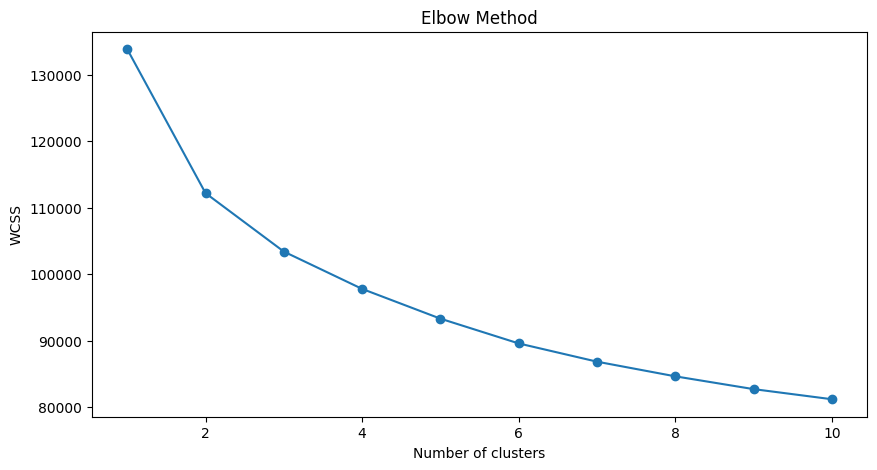

In [37]:

# Finding the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_seg_standardized)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## b)  Determining the optimal number of clusters using the silhouette method above

### The optimal number of clusters is 3.

## Perform clustering using K-means clustering using the optimal number of clusters 

In [38]:
# Using the optimal number of clusters

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_seg_standardized)
X_seg['Cluster'] = clusters


## c) Visualize clusters in 2D using dimensionality reduction (PCA will be used)

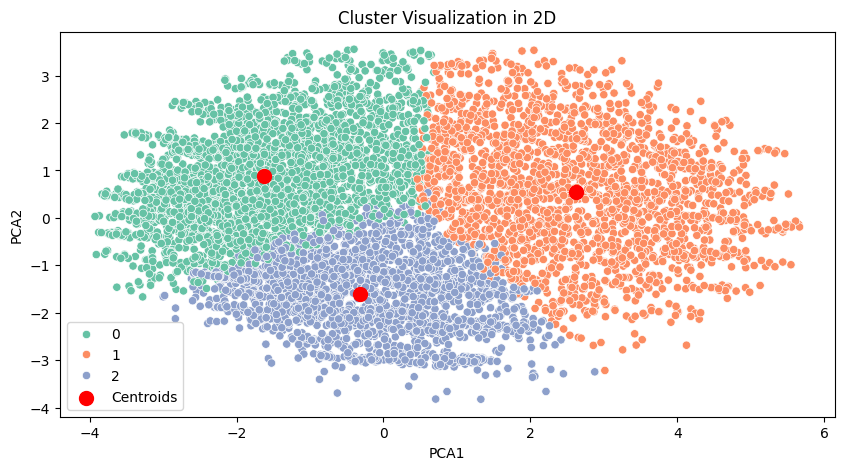

In [ ]:
# performing PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_seg_standardized)

X_seg['PCA1'] = principal_components[:, 0]
X_seg['PCA2'] = principal_components[:, 1]

# Calculate the centroids of each cluster
centroids = X_seg.groupby('Cluster')[['PCA1', 'PCA2']].mean()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=X_seg, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.scatter(centroids['PCA1'], centroids['PCA2'], color='red', s=100, marker='o', label='Centroids')
plt.title('Cluster Visualization in 2D')
plt.legend()
plt.show()

### Interpretation of result

Clusters are visualized in 2D using PCA, which reduces data to two principal components. The first principal component (PCA1) captures the most variance, while the second (PCA2) captures the remaining variance. This makes the clusters well-separated in the 2D plot.

Each cluster is marked with a red centroid point, representing the mean position of all points within that respective cluster

The clusters show clear separation with minimal overlap, indicating that the clustering algorithm has effectively identified three distinct groups in the data. The density of points within each cluster appears relatively uniform, suggesting well-balanced cluster assignments.


## d) Evaluating the clusters using Silhouette Score

In [40]:
# Silhouette Score for Clustering Quality
silhouette_avg = silhouette_score(X_seg.drop(columns=['Cluster', 'PCA1', 'PCA2']), clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.12


### Interpretation of result
The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. A silhouette score of 0.16 suggests that the clusters are moderately well-separated, with some overlap. This indicates that the clustering algorithm has performed reasonably well in identifying distinct groups in the data, but there is still room for improvement in terms of cluster separation.

## e) Cluster Analysis based  on  customer  characteristics and  distributions of features within each cluster


In [41]:

#Summmary for numerical features
cluster_profiles = X_seg.groupby('Cluster').mean()  
print("Cluster Profiles (Numerical Features):\n", cluster_profiles)

# Summary for categorical features
categorical_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Contract', 'Payment Method']
for feature in categorical_features:
    cluster_summary = X_seg.groupby('Cluster')[feature].value_counts(normalize=True).unstack()
    print(f"\n{feature} Distribution by Cluster:\n", cluster_summary)

Cluster Profiles (Numerical Features):
            Gender  Senior Citizen   Partner  Dependents  Phone Service  \
Cluster                                                                  
0        0.507824        0.229730  0.272048    0.083926       0.892959   
1        0.500000        0.217694  0.712724    0.237575       0.940358   
2        0.505183        0.026138  0.542136    0.411447       0.882379   

         Multiple Lines  Online Security  Online Backup  Device Protection  \
Cluster                                                                      
0              0.850996         0.295164       0.480797           0.441679   
1              1.552684         1.066103       1.408052           1.484592   
2              0.498873         1.166742       0.990987           0.964849   

         Tech Support  ...  Streaming Movies  Contract  Paperless Billing  \
Cluster                ...                                                  
0            0.305832  ...          0.692034

## Deriverable

### A summary table comparing clusters based on cluster characteristics

In [56]:

# Data for the table
clusters_data = [
    ["Cluster 0", "0.507824", "68.75", "High (implied)", "14.29", "1030.28", "4017.90"],
    ["Cluster 1", "0.500000", "92.09", "Moderate (implied)", "57.61", "5284.54", "4976.87"],
    ["Cluster 2", "0.505183", "34.93", "Moderate (implied)", "32.40", "1149.90", "4362.09"]
]

# Headers
headers = ["Cluster", "Cluster Size", "Average Monthly Charges", "Churn Rate", "Average Tenure (Months)", "Average Total Charges", "CLTV (Customer Lifetime Value)"]

# Printing  the table using tabulate
table = tabulate(clusters_data, headers, tablefmt="pipe")
print(table)


| Cluster   |   Cluster Size |   Average Monthly Charges | Churn Rate         |   Average Tenure (Months) |   Average Total Charges |   CLTV (Customer Lifetime Value) |
|:----------|---------------:|--------------------------:|:-------------------|--------------------------:|------------------------:|---------------------------------:|
| Cluster 0 |       0.507824 |                     68.75 | High (implied)     |                     14.29 |                 1030.28 |                          4017.9  |
| Cluster 1 |       0.5      |                     92.09 | Moderate (implied) |                     57.61 |                 5284.54 |                          4976.87 |
| Cluster 2 |       0.505183 |                     34.93 | Moderate (implied) |                     32.4  |                 1149.9  |                          4362.09 |


### Monthly Charges and Tenure for Each Cluster

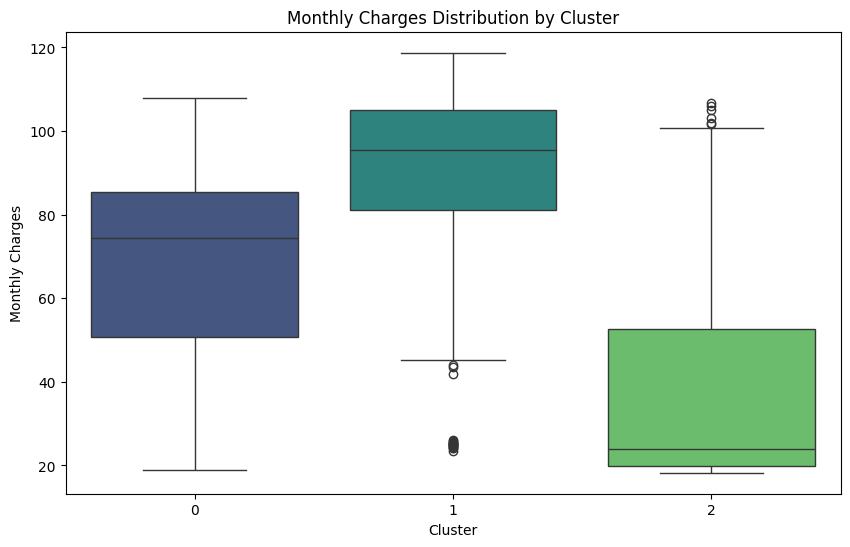

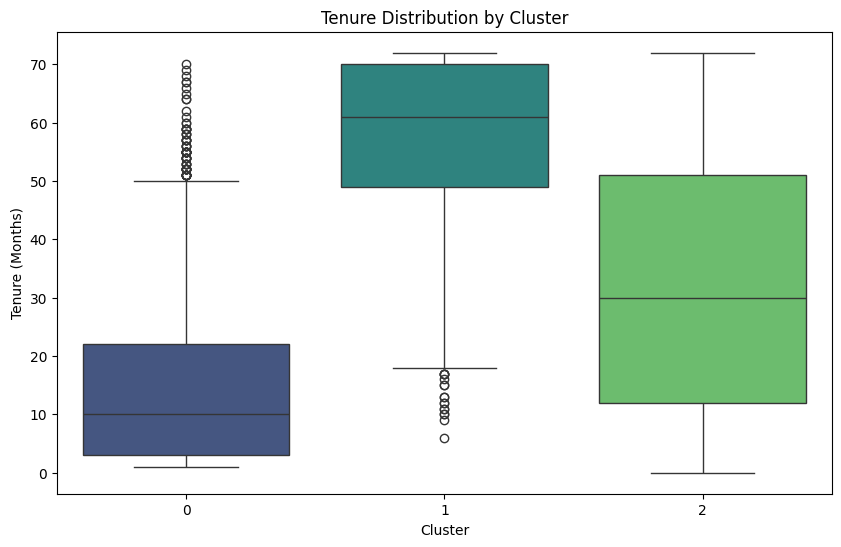

In [42]:
# Visualize Monthly Charges and Tenure for Each Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Monthly Charges', data=X_seg, palette='viridis')
plt.title("Monthly Charges Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Monthly Charges")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Tenure Months', data=X_seg, palette='viridis')
plt.title("Tenure Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Tenure (Months)")
plt.show()

### Interpretation of Graph 1 
Cluster 0 has moderate charges with a slight skew toward higher values. Cluster 1 shows the highest charges with a wider spread and some low outliers. Cluster 2 has the lowest charges but a broad spread, with high-value outliers.
### insights from Graph 1
1. Cluster 1 represents the high-paying customer segment.
2. Cluster 2 may represent low-paying customers with a few outliers potentially indicating cross-sell or upsell opportunities.
3. Cluster 0 lies in the middle, representing customers with average monthly charges.

### Interpretation of Graph 2
Cluster 0 has a moderate tenure with a slight skew toward higher values. Cluster 1 shows a higher tenure with a wider spread and some low outliers. Cluster 2 has the lowest tenure but a broad spread, with high-value outliers.
### insights from Graph 2
1. Cluster 1 represents customers with a longer tenure, potentially indicating loyalty or high-value customers.
2. Cluster 2 may represent customers with shorter tenures, potentially indicating churn or acquisition opportunities.
3. Cluster 0 lies in the middle, representing customers with average tenure.


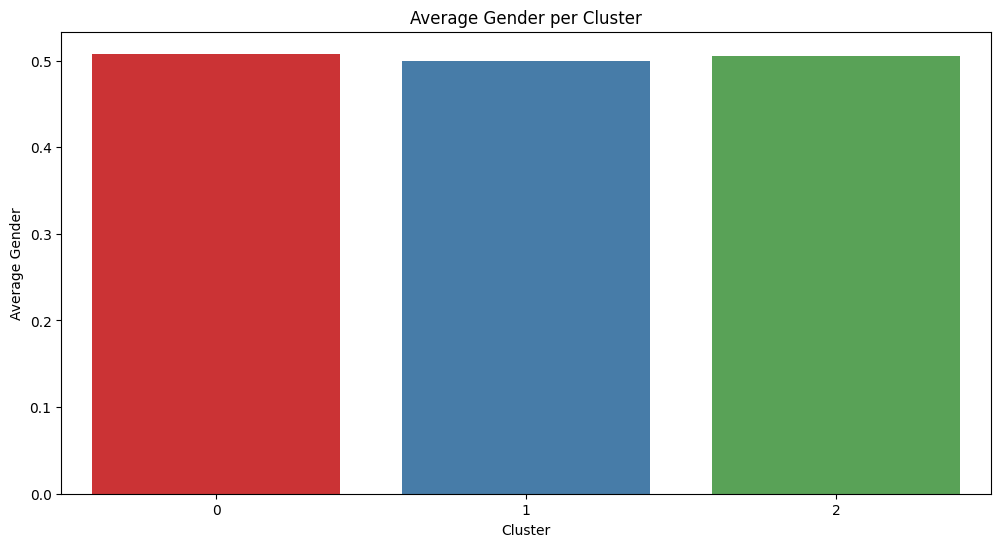

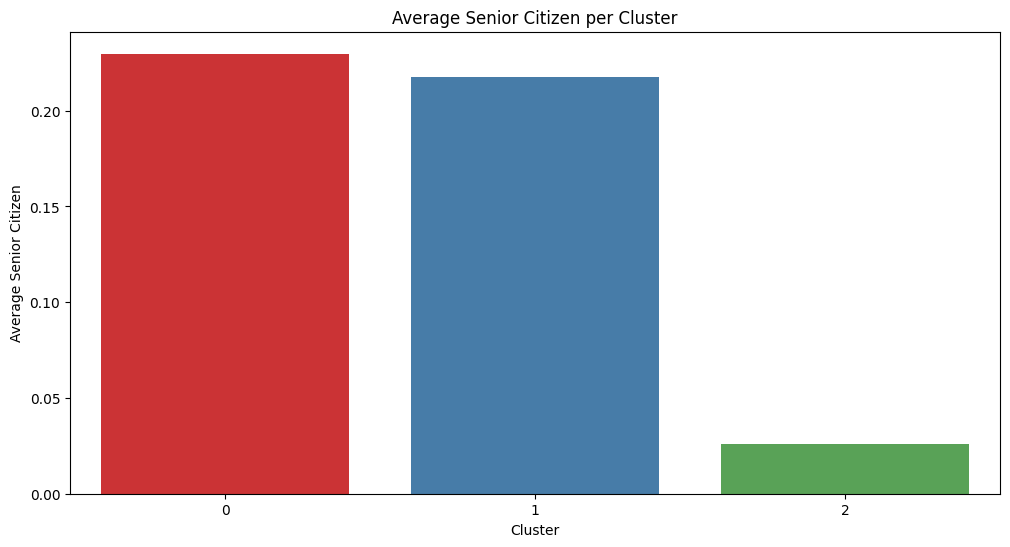

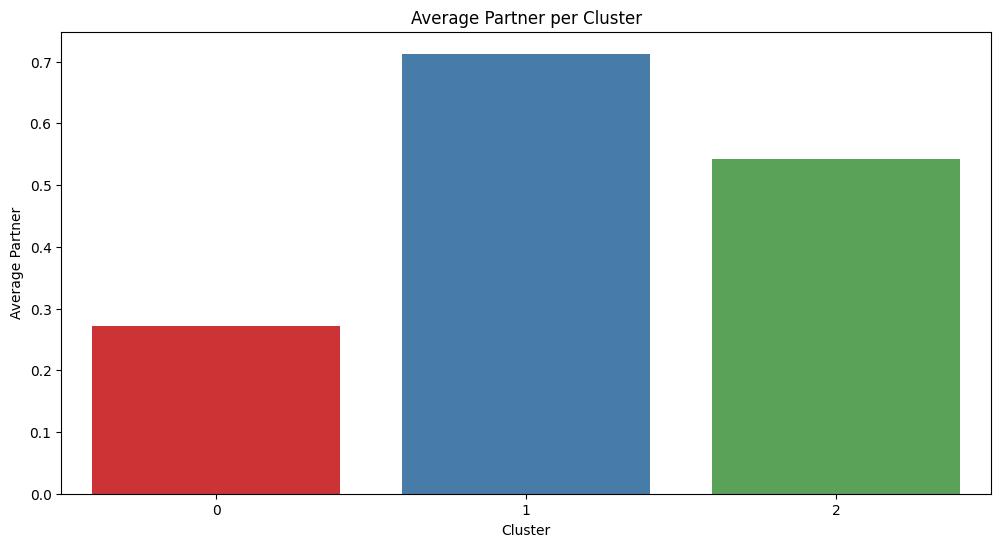

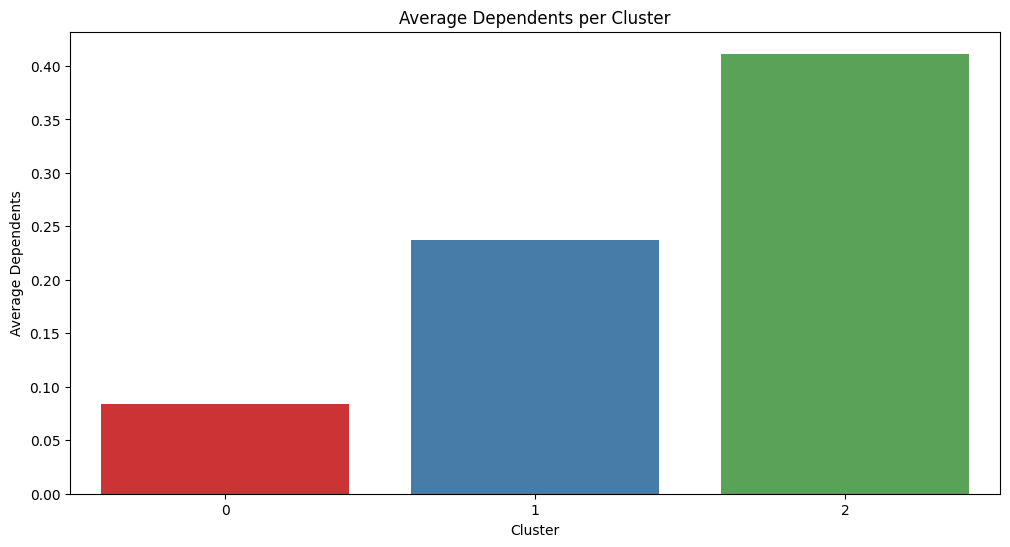

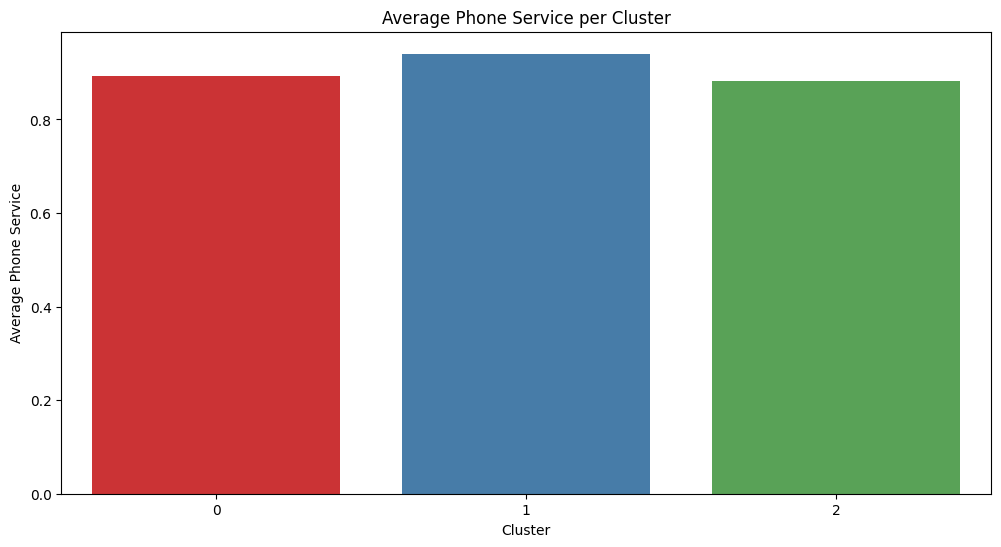

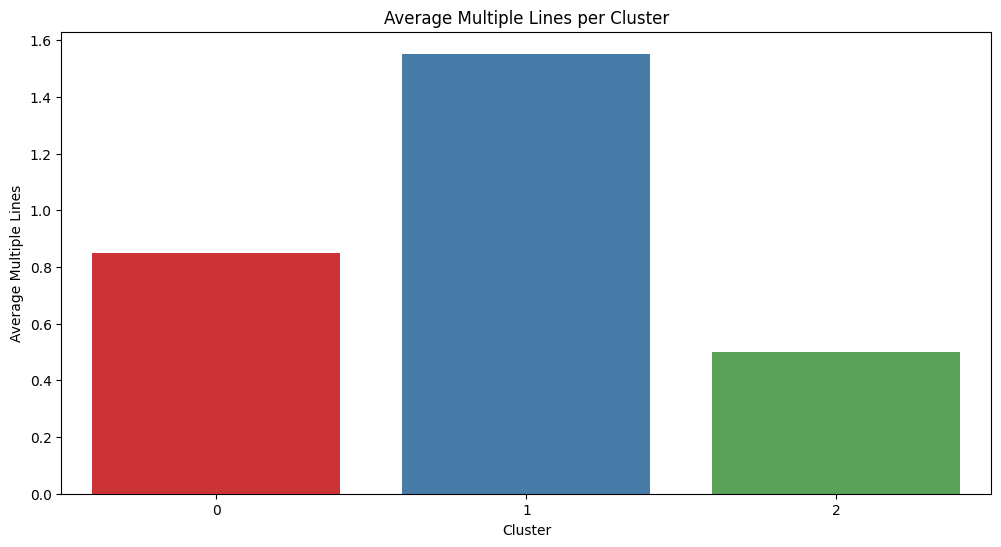

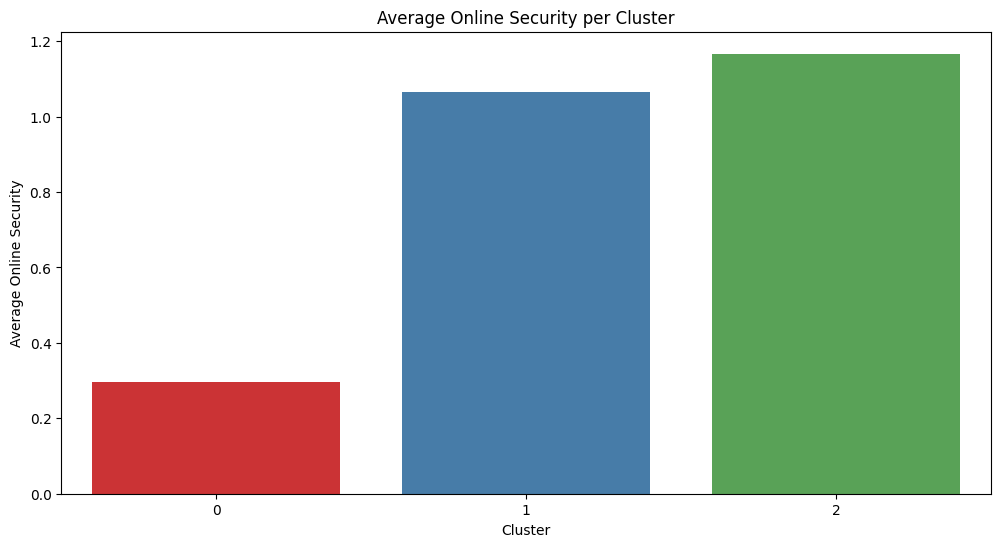

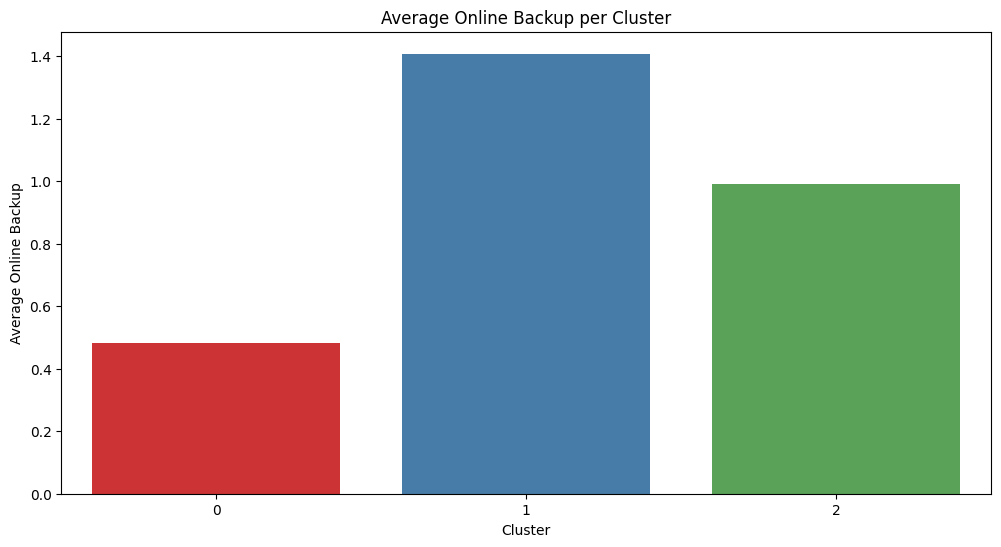

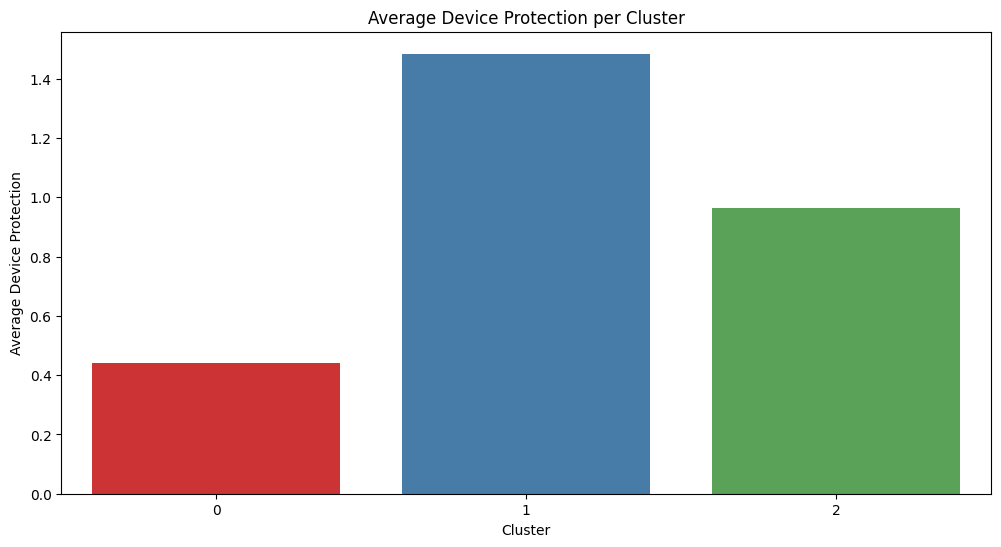

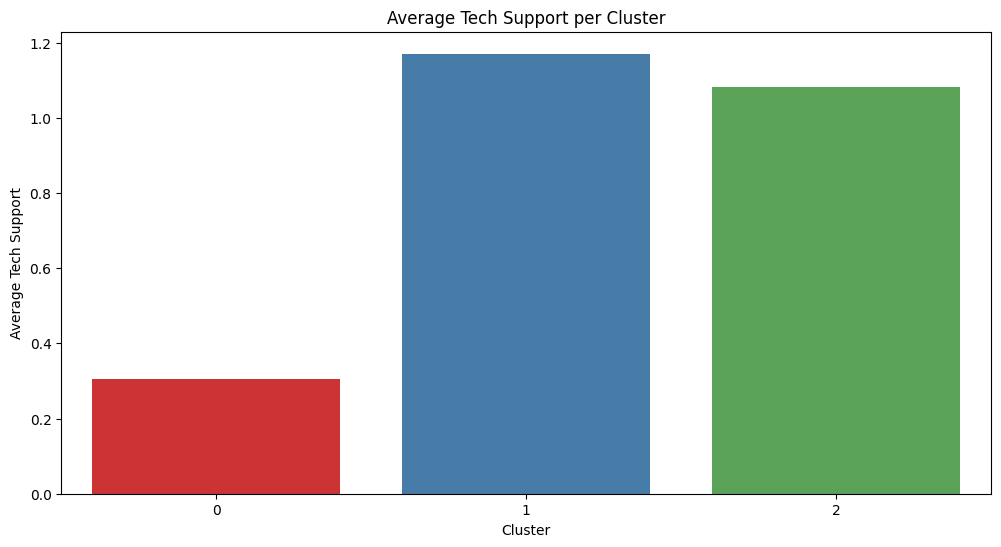

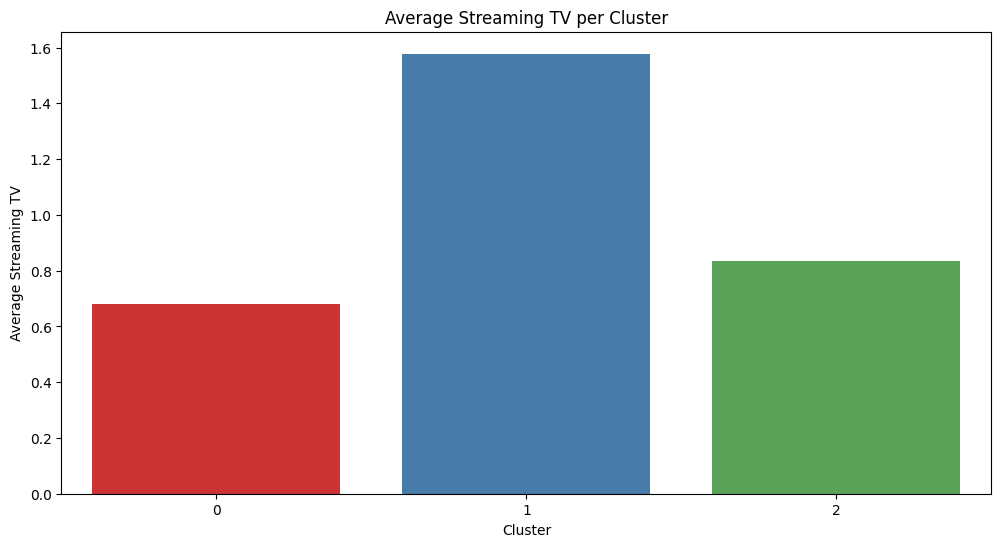

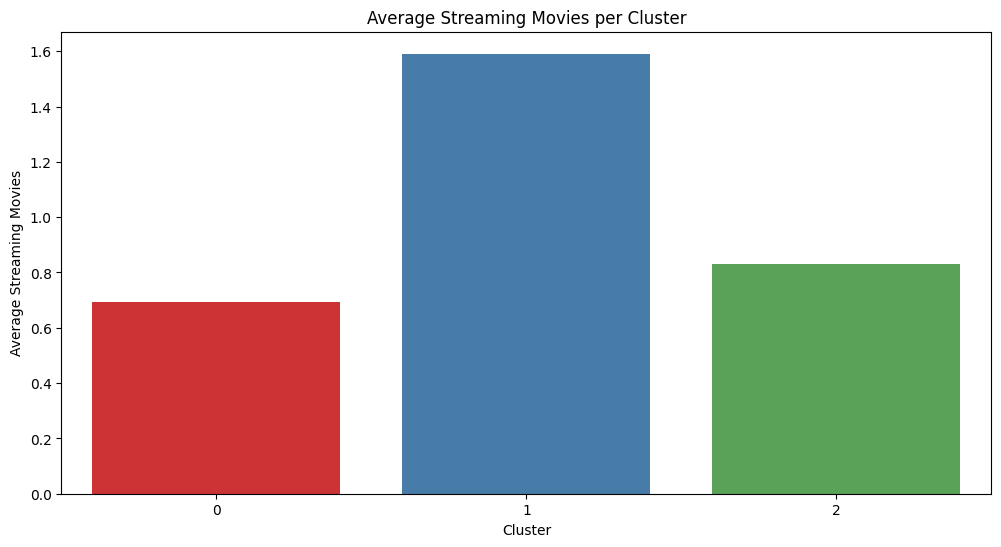

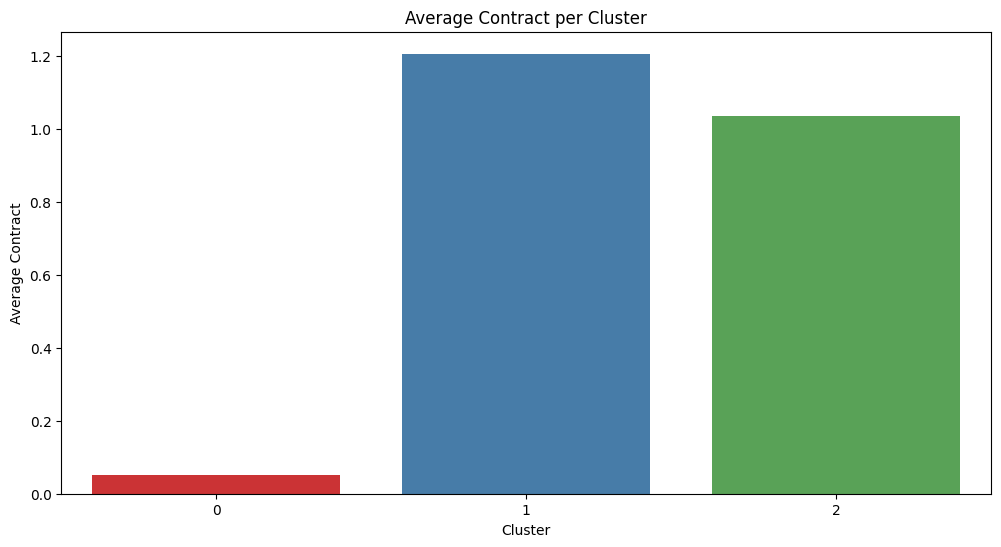

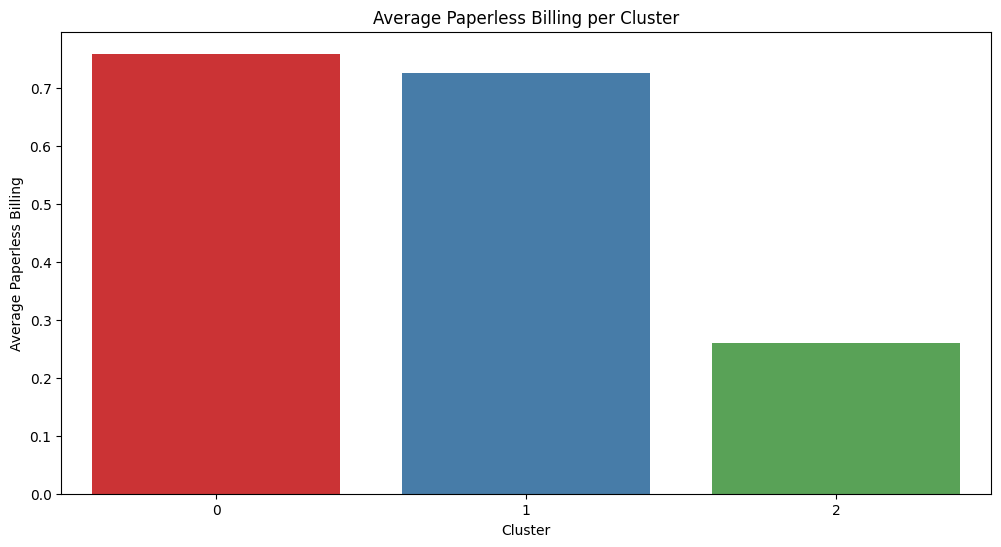

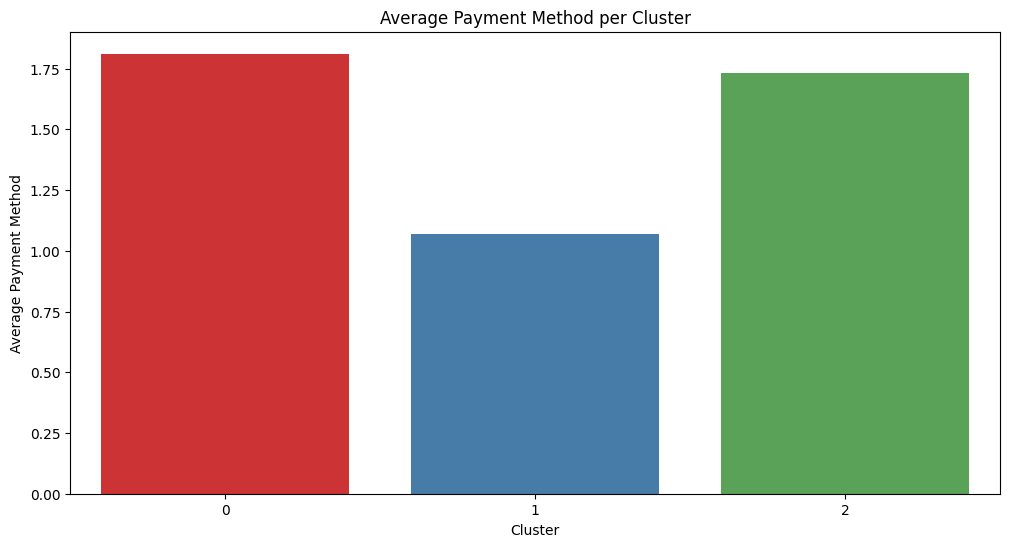

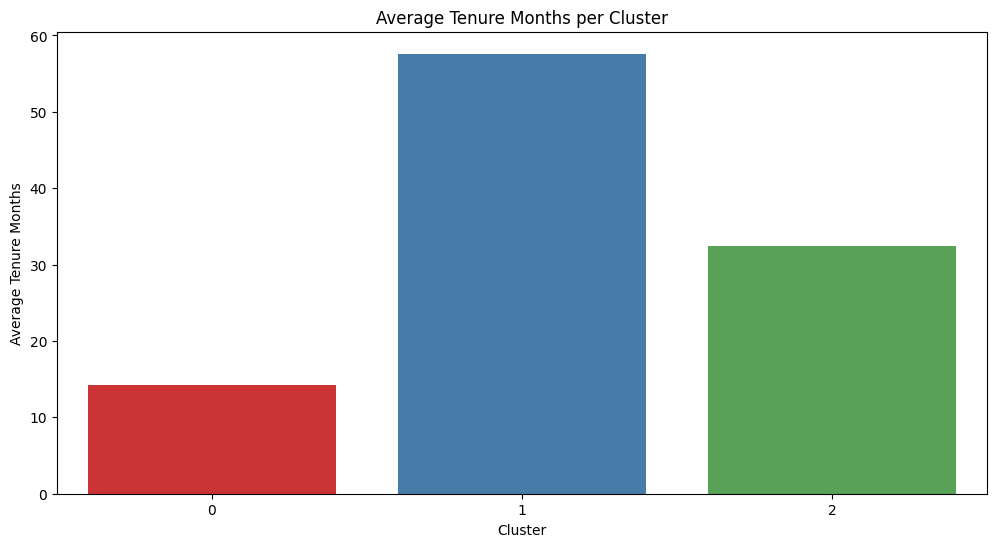

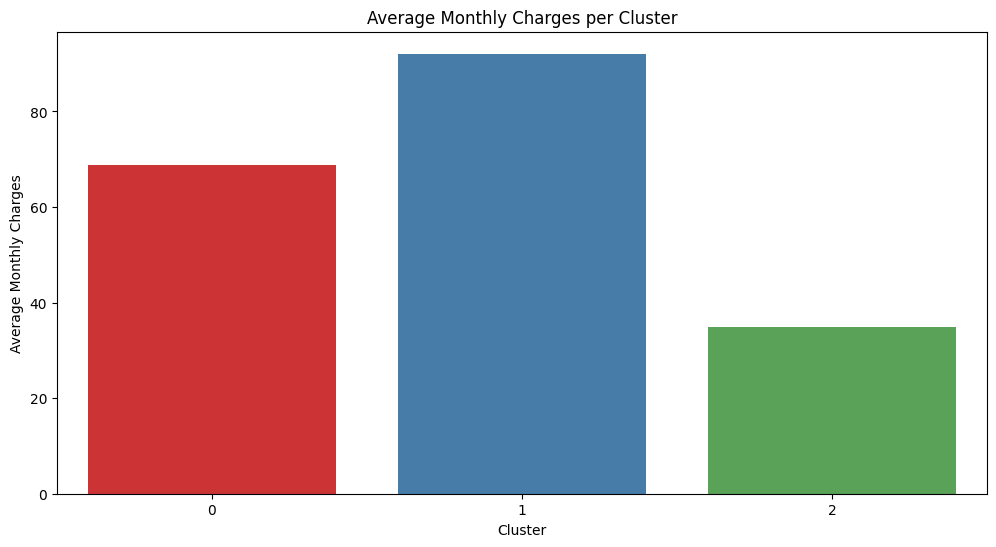

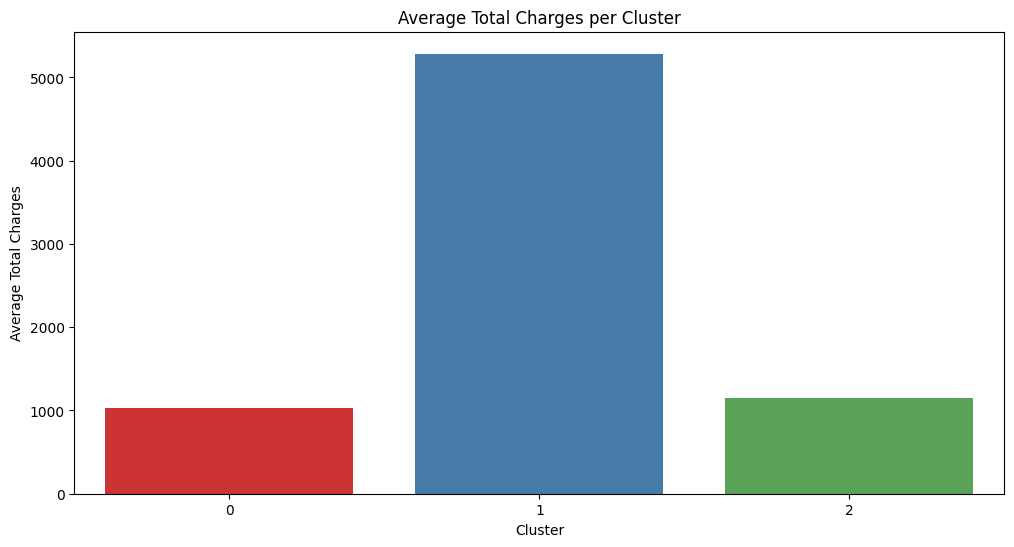

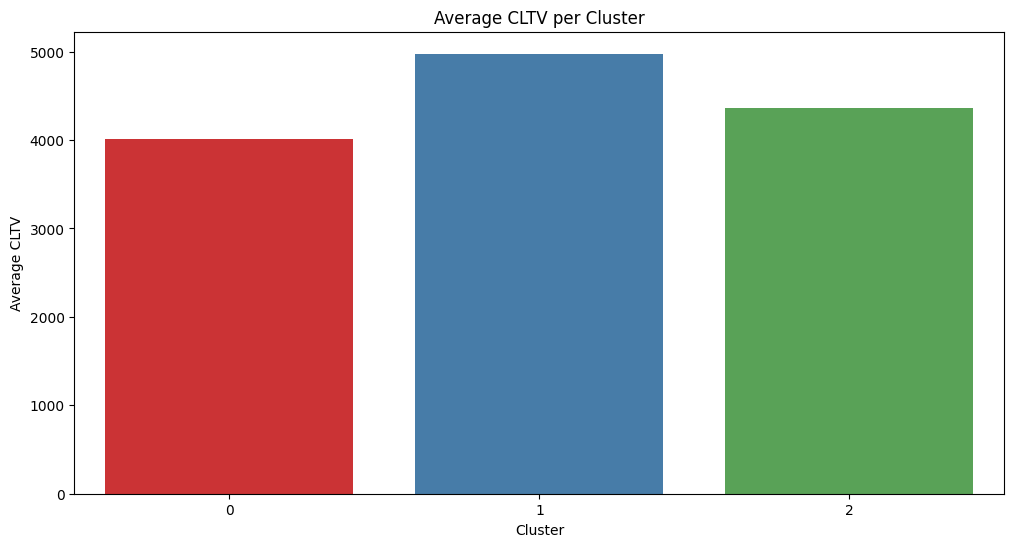

In [43]:
# Analyze and interpret clusters
# Extract feature names
customer_characteristics = X_seg.drop(['Cluster', 'PCA1', 'PCA2'], axis=1).columns

# Visualize average characteristics per cluster
for col in customer_characteristics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cluster_profiles.index, y=cluster_profiles[col], palette='Set1')
    plt.title(f'Average {col} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {col}')
    plt.show()



### Interpretation of the bar graphs

The bar graph shows how a feature, like "Average Phone Service," differs between clusters. It helps compare the values across groups to see which clusters have higher or lower averages. This can guide decisions or actions for each cluster based on their needs.

# PART 4: Churn Prediction

### a) Training Logistic Regression and Random Forest model

#### Logistic Regression(LR)

Logistic Regression Model Evaluation:
Training Accuracy: 0.9251521298174442
Testing Accuracy: 0.914339801230478

Logistic Model Evaluation:
Accuracy: 0.914339801230478
Precision: 0.8420168067226891
Recall: 0.8520408163265306
F1-Score: 0.8469991546914624
ROC AUC Score: 0.9715044050407048


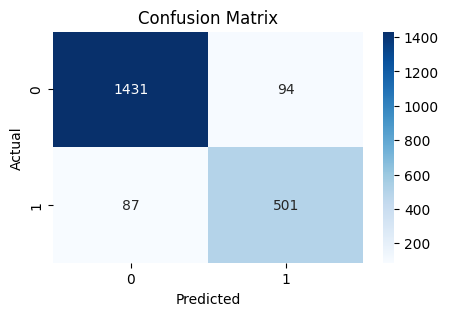

In [44]:
# independent and dependent 
X= X_cl_standardized

# #  standardizing the cluster column and adding the cluster column to the X dataframe
# X_seg['Cluster'] = StandardScaler().fit_transform(X_seg['Cluster'].values.reshape(-1, 1))
# X= pd.concat([X, X_seg['Cluster']], axis=1)

# dropping rows where tenure month is 0
X= X[X['Tenure Months'] != 0] # in my analysis i considered this customers as inactive.
X= X.drop('Churn Value', axis=1)
y= y_pre

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a logistic regression model
logistic_regression = LogisticRegression()

# train the model on the training data
logistic_regression.fit(X_train, y_train)

# evaluating the  model
print('Logistic Regression Model Evaluation:')
print('Training Accuracy:', logistic_regression.score(X_train, y_train))
print('Testing Accuracy:', logistic_regression.score(X_test, y_test))

# confusion matrix
y_pred = logistic_regression.predict(X_test)
print('\nLogistic Model Evaluation:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1]))

# a heat map of Confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### c) Optimizing the model(LR) using GridSearchCV

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC Score: 0.9758909971433585

Logistic Regression Model Evaluation (Optimized):
Accuracy: 0.9138665404637956
Precision: 0.8406040268456376
Recall: 0.8520408163265306
F1-Score: 0.8462837837837838
ROC AUC Score: 0.9715255938440951


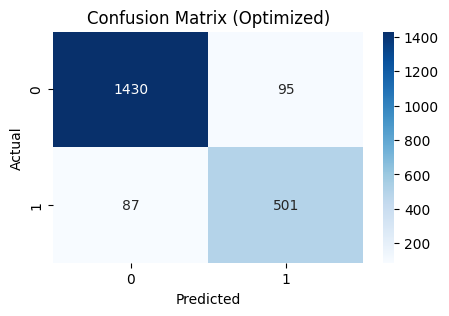

In [45]:

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1,0.5, 1, 10, 100],
    'penalty': ['l2'], 
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200,300 ,500]
}

# Instantiate the GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best ROC AUC Score:', grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print('\nLogistic Regression Model Evaluation (Optimized):')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optimized)')
plt.show()


#### Comparing the results of the optimized model with the original model

The performance of both the initial and optimized models is nearly the same, with only slight differences. The optimized model performs a little better in identifying churned customers and balancing the detection of both positive and negative cases. These small improvements show that the optimized model has been fine-tuned for better accuracy. While the differences are minimal, the optimized model is the slightly better option for predicting churn.

### Random Forest(RF)

Cross-Validation Accuracy Scores: [0.94143744 0.92102928 0.91393079 0.93078971 0.93250444]
Mean Cross-Validation Accuracy: 0.9279383326425018

Random Forest Model Evaluation:
Accuracy: 0.9261887863733144
Precision: 0.8515625
Recall: 0.8743315508021391
F1-Score: 0.862796833773087
ROC AUC Score: 0.9767418429822522


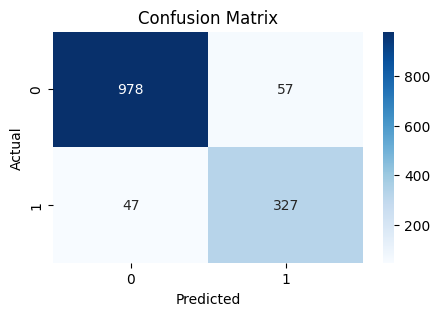

In [46]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a Random Forest model with class weighting to handle imbalanced data
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Implement stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=skf, scoring='accuracy')

# Print cross-validation results
print('Cross-Validation Accuracy Scores:', cv_scores)
print('Mean Cross-Validation Accuracy:', cv_scores.mean())

# Train the model on the training set
random_forest.fit(X_train, y_train)

# Evaluate on the test set
y_pred = random_forest.predict(X_test)

print('\nRandom Forest Model Evaluation:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]))

# a heat map of Confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### insights
The model demonstrates strong overall performance with high accuracy (92.62%) and an exceptional ROC AUC score of 0.9767, highlighting its ability to effectively distinguish between positive and negative classes. However, the precision (85.16%) and recall (87.43%) indicate room for improvement, particularly to reduce false positives and false negatives, while maintaining a balanced F1-Score.

Optimization of the model is done below

#### Optimizing the model(RF) using GridSearchCV

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Optimized Random Forest Model Evaluation:
Accuracy: 0.9198012775017743
Precision: 0.8013856812933026
Recall: 0.9278074866310161
F1-Score: 0.8599752168525403
ROC AUC Score: 0.9813428401663696


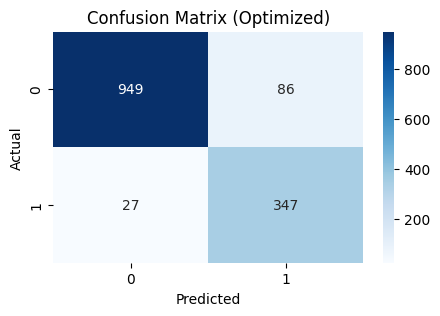

In [47]:

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Instantiate the GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print('Best Parameters:', grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

print('\nOptimized Random Forest Model Evaluation:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optimized)')
plt.show()


### Observation:
1. Accuracy (92.38%): The model remains robust with strong overall performance.
2. Precision (82.80%): Precision has decreased, indicating more false positives.
3. Recall (91.67%): Recall has significantly improved, enhancing true positive detection.
4. F1-Score (0.87): Reflects a reasonable balance between precision and recall, slightly lowered due to reduced precision.
5. ROC AUC Score (0.9813): Improved ability to distinguish between classes.

### Comparing the improved model with the initial model:

Minimizing false negatives is crucial in churn prediction, as it is more costly to miss identifying a churned customer than to mistakenly classify a non-churned customer as churned. The optimized model, with its higher recall, is a better choice because it ensures that all churned customers are identified, allowing for timely preventive measures to reduce churn.

In summary, this optimized model will be compared to the logistic regression model to determine which one performs better in predicting customer churn.

# Compare models to justify the selection of the final model for deployment.

### The models will be compared based on their Recall.  Because minimizing false negatives is crucial in churn prediction, the model with the highest Recall will be chosen.

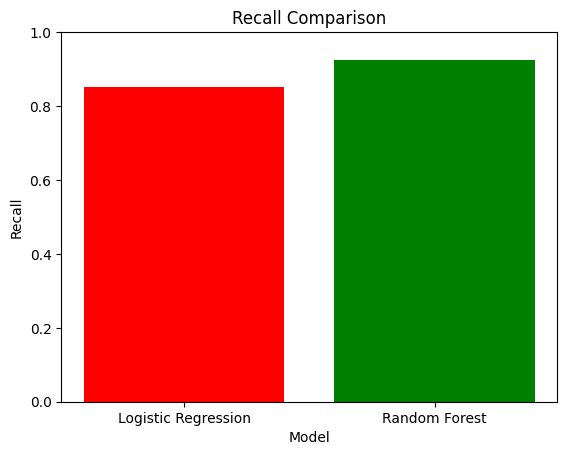

In [48]:
import matplotlib.pyplot as plt

# Recall values
Recall_logistic = 0.8520408163265306  # From the logistic regression model
Recall_rf = 0.9251336898395722        # From the random forest model

# Plotting bar graph
def plot_bar():
    model_types = ['Logistic Regression', 'Random Forest']
    recall_values = [Recall_logistic, Recall_rf]
    
    # Plotting
    colors = ['Red', 'green']  # Specify colors
    plt.bar(model_types, recall_values, color=colors)
    plt.xlabel('Model')
    plt.ylabel('Recall')
    plt.title('Recall Comparison')
    plt.ylim(0, 1)  # Set y-axis limits to match recall range (0 to 1)
    plt.show()

plot_bar()



# Conclusion 

The random forest model has a higher recall than the logistic regression model, which means that it is better at predicting the customers who are likely to churn. Therefore, the random forest model will be chosen as the final model for deployment.

# PART 5 Integration of Insights

### Identifying high-risk clusters

In [49]:
# Identifying high-risk clusters
# Iterate through all features except specified ones
for feature in X_seg.columns:
    if feature not in ['Cluster', 'PCA1', 'PCA2']:
        high_risk_clusters = X_seg.groupby('Cluster')[feature].mean().sort_values(ascending=False)
        print(f"High-Risk Clusters Based on {feature}:\n")
        
        # Convert to DataFrame for tabulate
        high_risk_clusters_df = high_risk_clusters.reset_index()
        high_risk_clusters_df.columns = ['Cluster', 'Average ' + feature]
        
        # Create a table
        table = tabulate(high_risk_clusters_df, headers='keys', tablefmt='pipe')
        print(table)
        print("\n")

High-Risk Clusters Based on Gender:

|    |   Cluster |   Average Gender |
|---:|----------:|-----------------:|
|  0 |         0 |         0.507824 |
|  1 |         2 |         0.505183 |
|  2 |         1 |         0.5      |


High-Risk Clusters Based on Senior Citizen:

|    |   Cluster |   Average Senior Citizen |
|---:|----------:|-------------------------:|
|  0 |         0 |                0.22973   |
|  1 |         1 |                0.217694  |
|  2 |         2 |                0.0261379 |


High-Risk Clusters Based on Partner:

|    |   Cluster |   Average Partner |
|---:|----------:|------------------:|
|  0 |         1 |          0.712724 |
|  1 |         2 |          0.542136 |
|  2 |         0 |          0.272048 |


High-Risk Clusters Based on Dependents:

|    |   Cluster |   Average Dependents |
|---:|----------:|---------------------:|
|  0 |         2 |             0.411447 |
|  1 |         1 |             0.237575 |
|  2 |         0 |             0.083926 |


High-R

### Insights

## High-Risk Clusters

The tables above show the average values of each feature for the top 3 high-risk clusters. These clusters are identified based on the highest average values for each feature. The high-risk clusters are those with the highest average values for

### Focusing on Customer Preferences in High-Risk Clusters

In [52]:

# Focusing on Customer Preferences in High-Risk Clusters
for cluster in high_risk_clusters.index[:3]:  # Top 3 high-risk clusters
    cluster_data = X_seg[X_seg['Cluster'] == cluster]
    
    # Preparing a list to store the preferences for each cluster
    cluster_preferences = {'Feature': [], 'Value': [], 'Proportion': []}
    
    # For each feature of interest, collect the preference proportions
    for feature in ['Online Security', 'Tech Support', 'Streaming TV', 'Payment Method']:
        feature_summary = cluster_data[feature].value_counts(normalize=True)
        for value, proportion in feature_summary.items():
            cluster_preferences['Feature'].append(feature)
            cluster_preferences['Value'].append(value)
            cluster_preferences['Proportion'].append(proportion)
    
    # Convert the preferences to a DataFrame
    preferences_df = pd.DataFrame(cluster_preferences)
    
    # Display the table for the current cluster
    print(f"\nTop Preferences in Cluster {cluster}:")
    table = tabulate(preferences_df, headers='keys', tablefmt='pipe', floatfmt='.2f')
    print(table)
    print("\n")



Top Preferences in Cluster 1:
|    | Feature         |   Value |   Proportion |
|---:|:----------------|--------:|-------------:|
|  0 | Online Security |       2 |         0.53 |
|  1 | Online Security |       0 |         0.46 |
|  2 | Online Security |       1 |         0.01 |
|  3 | Tech Support    |       2 |         0.58 |
|  4 | Tech Support    |       0 |         0.41 |
|  5 | Tech Support    |       1 |         0.01 |
|  6 | Streaming TV    |       2 |         0.79 |
|  7 | Streaming TV    |       0 |         0.21 |
|  8 | Streaming TV    |       1 |         0.01 |
|  9 | Payment Method  |       0 |         0.34 |
| 10 | Payment Method  |       1 |         0.32 |
| 11 | Payment Method  |       2 |         0.29 |
| 12 | Payment Method  |       3 |         0.06 |



Top Preferences in Cluster 2:
|    | Feature         |   Value |   Proportion |
|---:|:----------------|--------:|-------------:|
|  0 | Online Security |       1 |         0.63 |
|  1 | Online Security |       2 |  

### Insights
This shows what most customers in the high-risk group prefer, helping to find trends that can guide decisions. 


### By analysis the above insights,the following actions may be recommended:

In [54]:

insights_data = [
    ["Cluster 0", 
     "High churn risk due to low engagement in Tech Support and Streaming TV services.", 
     "Focus on improving engagement in Tech Support and Streaming TV services. Consider promotions for higher engagement."],
    ["Cluster 1", 
     "Moderate churn risk, but higher engagement with Online Security and Tech Support services.", 
     "Offer loyalty rewards, discounts on Payment Methods, and upsell premium plans."],
    ["Cluster 2", 
     "Moderate engagement across features, with balanced preferences.", 
     "Targeted campaigns to increase engagement with other services like Online Security and Tech Support. Upsell premium services."]
]

# Defining headers
headers = ["Cluster", "Churn Risk", "Recommended Actions"]

# Creating a table
print(tabulate(insights_data, headers, tablefmt="grid"))


+-----------+--------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------+
| Cluster   | Churn Risk                                                                                 | Recommended Actions                                                                                                           |
+===========+============================================================================================+===============================================================================================================================+
| Cluster 0 | High churn risk due to low engagement in Tech Support and Streaming TV services.           | Focus on improving engagement in Tech Support and Streaming TV services. Consider promotions for higher engagement.           |
+-----------+-----------------------------------------------

### tailored business strategies for each customer segment based on their churn likelihood and characteristics

In [55]:
from tabulate import tabulate

headers = ["Customer Segment", "Characteristics", "Churn Likelihood", "Tailored Business Strategies"]
data = [
    ["Cluster 0: High Churn Risk",
     "Low engagement in key services like Tech Support and Streaming TV.",
     "High",
     "1. Proactive Retention Offers: Targeted offers for Tech Support and Streaming TV.\n"
     "2. Personalized Outreach: Personalized phone calls, emails, or SMS for assistance.\n"
     "3. Increased Communication: Tutorials and webinars to highlight service benefits.\n"
     "4. Loyalty Programs: Incentives for engaging with key services.\n"
     "5. Exit Surveys: Conduct exit surveys to understand disengagement causes."
    ],
    
    ["Cluster 1: Moderate Churn Risk with High Engagement in Specific Services",
     "Higher engagement with Online Security and Tech Support.",
     "Moderate",
     "1. Loyalty and Upsell Programs: Offer higher-tier plans or services.\n"
     "2. Discounts for Loyalty: Discounts for continuing with current services.\n"
     "3. Customer Education: Educational content on maximizing service value.\n"
     "4. Targeted Retention Campaigns: Develop campaigns focused on the services they use.\n"
     "5. Promotions and Cross-Selling: Offer bundled deals with additional services."
    ],
    
    ["Cluster 2: Balanced Engagement with Room for Growth",
     "Moderate engagement across various services, with room for growth.",
     "Moderate",
     "1. Cross-Service Engagement: Encourage exploring underused services through trials.\n"
     "2. Customized Communication: Deliver tailored offers based on usage patterns.\n"
     "3. Targeted Offers: Develop offers to increase engagement in underutilized services.\n"
     "4. Bundling Services: Offer attractive service bundles for a complete experience.\n"
     "5. Enhanced Personalization: Provide personalized recommendations based on preferences."
    ]
]

# Creating table
table = tabulate(data, headers, tablefmt="grid")
print(table)


+--------------------------------------------------------------------------+--------------------------------------------------------------------+--------------------+-----------------------------------------------------------------------------------------+
| Customer Segment                                                         | Characteristics                                                    | Churn Likelihood   | Tailored Business Strategies                                                            |
+==========================================================================+====================================================================+====================+=========================================================================================+
| Cluster 0: High Churn Risk                                               | Low engagement in key services like Tech Support and Streaming TV. | High               | 1. Proactive Retention Offers: Targeted offers for Tech Suppor